1. Create a `data` folder in your local project repository.  

2. Download these two CSV files and place them in the data folder:

    a.	Gross Domestic Product (GDP) per capita http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD **DO NOT APPLY ANY FILTERS**
     - rename the file to `gdp_percapita.csv`
     - open it with a text editor (**not excel**) and take a look

    b.	Percentage of Individuals using the Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H  **DO NOT APPLY ANY FILTERS**
     - rename the file to `internet_use.csv`
     - open it with a text editor (**not excel**) and take a look

2.	Launch a Jupyter Notebook. 
 - _*IMPORTANT:  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.*_
  - Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from `Code` to `Markdown`.

3. Import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
    
4. Use the `%matplotlib inline` magic command so that your plots show in the notebook _without_ having to call `plt.show()` every time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

5.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first 6 rows.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN


6. Repeat for the internet use dataset. Call this DataFrame `internet_df`. Take a look at the first six rows.

In [3]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)
internet_df.head(6)
internet_df.tail(2)

,Country or Area,Year,Value,Value Footnotes
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


98. Look at the shape of each DataFrame - how many rows? How many columns?

In [4]:
gdp_df.shape

(7176, 4)

In [5]:
internet_df.shape

(4495, 4)

6.	Take a look at the datatypes for the columns in each DataFrame.

In [6]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [7]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

99. Take a look at the last 10 rows of each DataFrame in turn.

In [8]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7166,Zimbabwe,1999,2872.714795,NaN
7167,Zimbabwe,1998,2915.052992,NaN
7168,Zimbabwe,1997,2856.118188,NaN
7169,Zimbabwe,1996,2808.558556,NaN
7170,Zimbabwe,1995,2573.993785,NaN
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


In [9]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


7.	Drop the `value footnotes` column from both DataFrames. Check that this worked as expected.


In [10]:
gdp_df.columns
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


In [11]:
internet_df.columns
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


8.	Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [12]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


9. Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [13]:
internet_df.columns = ['Country', 'Year', 'Internet_Per_Capita']
internet_df.head()

,Country,Year,Internet_Per_Capita
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


10.	Merge the two DataFrames to one. Merge **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`.

In [14]:
gdp_and_internet_use = pd.merge(gdp_df,internet_df, on = ['Country' , 'Year'], how = 'inner')

11.	Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [15]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Per_Capita
0,Afghanistan,2014,2102.384604,6.390000
1,Afghanistan,2013,2116.465258,5.900000
2,Afghanistan,2012,2075.491614,5.454545
3,Afghanistan,2011,1904.559926,5.000000
4,Afghanistan,2010,1957.029070,4.000000


12.	Look at the last five rows to make sure the data is clean and as expected.


In [16]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Per_Capita
3410,Zimbabwe,1997,2856.118188,0.033080
3411,Zimbabwe,1996,2808.558556,0.016790
3412,Zimbabwe,1995,2573.993785,0.007684
3413,Zimbabwe,1994,2603.927369,0.001739
3414,Zimbabwe,1990,2652.129209,0.000000


13.	Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [17]:
gdp_and_internet_use.dtypes
yearslist = [2004, 2009, 2014]
gdp_internet_2004_2009_2014 = gdp_and_internet_use.query("Year in @yearslist")
gdp_internet_2004_2009_2014.head(5)

,Country,Year,GDP_Per_Capita,Internet_Per_Capita
0,Afghanistan,2014,2102.384604,6.390000
5,Afghanistan,2009,1758.904477,3.550000
10,Afghanistan,2004,1200.278013,0.105809
13,Albania,2014,11586.833878,60.100000
18,Albania,2009,10313.916338,41.200000


14.	Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [18]:
gdp_internet_2004 = gdp_internet_2004_2009_2014.loc[gdp_internet_2004_2009_2014['Year'] == 2004].reset_index(drop = True)
gdp_internet_2004.head(1)

,Country,Year,GDP_Per_Capita,Internet_Per_Capita
0,Afghanistan,2004,1200.278013,0.105809


In [19]:
gdp_internet_2009 = gdp_internet_2004_2009_2014.loc[gdp_internet_2004_2009_2014['Year'] == 2009].reset_index(drop = True)
gdp_internet_2009.head(1)

,Country,Year,GDP_Per_Capita,Internet_Per_Capita
0,Afghanistan,2009,1758.904477,3.55


In [20]:
gdp_internet_2014 = gdp_internet_2004_2009_2014.loc[gdp_internet_2004_2009_2014['Year'] == 2014].reset_index(drop = True)
gdp_internet_2014.head(1)

,Country,Year,GDP_Per_Capita,Internet_Per_Capita
0,Afghanistan,2014,2102.384604,6.39


15.	Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [21]:
gdp_internet_2014.loc[gdp_internet_2014['Internet_Per_Capita'] == gdp_internet_2014.Internet_Per_Capita.max()]

,Country,Year,GDP_Per_Capita,Internet_Per_Capita
66,Iceland,2014,50450.741612,98.16


16.	Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [22]:
gdp_internet_2014.loc[gdp_internet_2014['Internet_Per_Capita'] == gdp_internet_2014.Internet_Per_Capita.min()]

,Country,Year,GDP_Per_Capita,Internet_Per_Capita
147,Timor-Leste,2014,3266.731666,1.14


17.	Repeat for 2004 and 2009.

In [23]:
gdp_internet_2009.loc[gdp_internet_2009['Internet_Per_Capita'] == gdp_internet_2009.Internet_Per_Capita.min()]

,Country,Year,GDP_Per_Capita,Internet_Per_Capita
144,Timor-Leste,2009,2729.281474,0.185252


In [24]:
gdp_internet_2004.loc[gdp_internet_2004['Internet_Per_Capita'] == gdp_internet_2004.Internet_Per_Capita.min()]

,Country,Year,GDP_Per_Capita,Internet_Per_Capita
95,Myanmar,2004,1473.020996,0.024337


18.	Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [25]:
gdp_internet_2014.loc[gdp_internet_2014['GDP_Per_Capita'] == gdp_internet_2014.GDP_Per_Capita.max()]

,Country,Year,GDP_Per_Capita,Internet_Per_Capita
86,Luxembourg,2014,113313.578898,94.67


In [26]:
gdp_internet_2014.GDP_Per_Capita.max()

113313.578897944

20.	Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [27]:
gdp_internet_2014.loc[gdp_internet_2014['GDP_Per_Capita'] == gdp_internet_2014.GDP_Per_Capita.min()]

,Country,Year,GDP_Per_Capita,Internet_Per_Capita
26,Burundi,2014,886.235296,1.38


In [28]:
gdp_internet_2014.GDP_Per_Capita.min()

886.2352957813

21.	Create some scatterplots:  
    a.  2004 Percent Using the Internet vs GDP Per Capita  
    b.	2009 Percent Using the Internet vs GDP Per Capita  
    c.	2014 Percent Using the Internet vs GDP Per Capita 

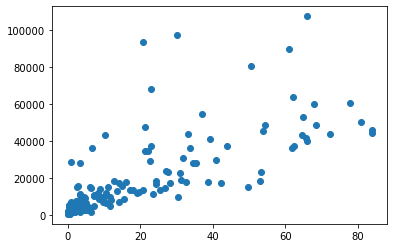

In [29]:
plt.scatter(x = 'Internet_Per_Capita', y = 'GDP_Per_Capita', data = gdp_internet_2004)

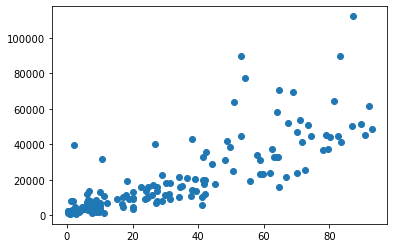

In [30]:
plt.scatter(x = 'Internet_Per_Capita', y = 'GDP_Per_Capita', data = gdp_internet_2009)

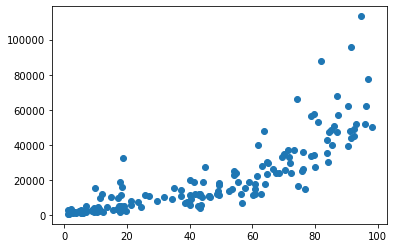

In [31]:
plt.scatter(x = 'Internet_Per_Capita', y = 'GDP_Per_Capita', data = gdp_internet_2014)

22.	Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

There does seem to be a correlation between these two variables. The internet usage per capita goes up as the GDP per capita grows. Also the correlations seem to get stronger with time.

23.	Look at the distribution of gdp per capita values for 2014. Is it unimodal?

GDP Per Capita is unimodal


(array([80., 28., 22., 11., 12.,  6.,  1.,  1.,  1.,  1.]),
 array([   886.23529578,  12128.969656  ,  23371.70401621,  34614.43837643,
         45857.17273665,  57099.90709686,  68342.64145708,  79585.3758173 ,
         90828.11017751, 102070.84453773, 113313.57889794]),
 <BarContainer object of 10 artists>)

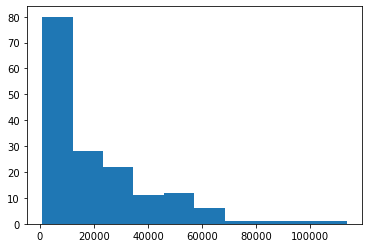

In [32]:
print('GDP Per Capita is unimodal')
plt.hist(x = 'GDP_Per_Capita', data = gdp_internet_2014)

24.	Look at the distribution of Internet Use for 2014. Is it unimodal?

Internet Per Capita is NOT unimodal


(array([30., 25.,  7.,  8., 23., 10., 16., 15., 16., 13.]),
 array([ 1.14 , 10.842, 20.544, 30.246, 39.948, 49.65 , 59.352, 69.054,
        78.756, 88.458, 98.16 ]),
 <BarContainer object of 10 artists>)

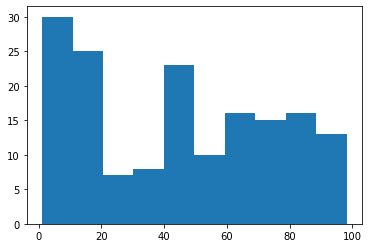

In [33]:
print('Internet Per Capita is NOT unimodal')
plt.hist(x = 'Internet_Per_Capita', data = gdp_internet_2014)

25.	What are the top 5 countries in terms of internet use in 2014?

In [34]:
gdp_internet_2014.nlargest(5, 'Internet_Per_Capita')

,Country,Year,GDP_Per_Capita,Internet_Per_Capita
66,Iceland,2014,50450.741612,98.16
18,Bermuda,2014,77361.104881,96.80
110,Norway,2014,62390.130313,96.30
41,Denmark,2014,52048.335493,95.99
86,Luxembourg,2014,113313.578898,94.67


26.	Create a DataFrame called top_5_internet **from the combined DataFrame that has all three years _for the 5 countries that had the greatest 2014 internet usage_**. You should have 15 rows. Check that this is true.

In [35]:
%who

gdp_and_internet_use	 gdp_df	 gdp_internet_2004	 gdp_internet_2004_2009_2014	 gdp_internet_2009	 gdp_internet_2014	 internet_df	 np	 pd	 
plt	 sns	 yearslist	 


In [36]:
top_5_internet = gdp_internet_2004_2009_2014.loc[(gdp_internet_2004_2009_2014.Country == 'Iceland') | (gdp_internet_2004_2009_2014.Country == 'Bermuda') | (gdp_internet_2004_2009_2014.Country == 'Norway') | (gdp_internet_2004_2009_2014.Country == 'Denmark') | (gdp_internet_2004_2009_2014.Country == 'Luxembourg')]

In [37]:
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Per_Capita
372,Bermuda,2014,77361.104881,96.800000
377,Bermuda,2009,89961.982744,83.250000
382,Bermuda,2004,90195.811565,60.990867
847,Denmark,2014,52048.335493,95.990000
852,Denmark,2009,50114.050052,86.840000
857,Denmark,2004,50446.541605,80.930000
1372,Iceland,2014,50450.741612,98.160000
1377,Iceland,2009,48770.950337,93.000000
1382,Iceland,2004,46051.743888,83.880000
1779,Luxembourg,2014,113313.578898,94.670000


27.	Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

Bermuda

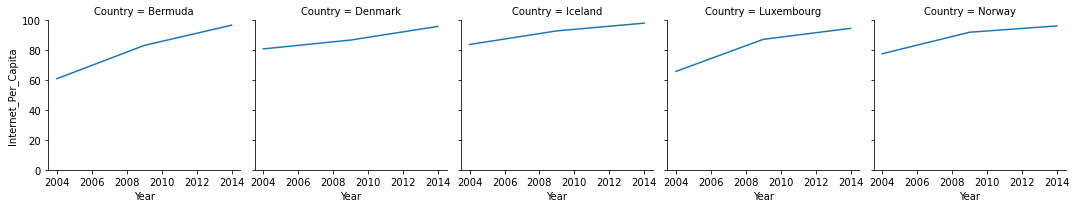

In [38]:
g_top_5_internet = sns.FacetGrid(top_5_internet, col="Country", ylim = (0,100))
g_top_5_internet.map_dataframe(sns.lineplot, x="Year", y="Internet_Per_Capita")

28.	Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

Burundi

In [39]:
gdp_internet_2014.nsmallest(5, 'Internet_Per_Capita')

,Country,Year,GDP_Per_Capita,Internet_Per_Capita
147,Timor-Leste,2014,3266.731666,1.14
26,Burundi,2014,886.235296,1.38
135,Somalia,2014,917.876549,1.63
60,Guinea,2014,2061.694838,1.72
108,Niger,2014,1126.805440,1.95


In [40]:
bottom_5_internet = gdp_internet_2004_2009_2014.loc[(gdp_internet_2004_2009_2014.Country == 'Timor-Leste') | (gdp_internet_2004_2009_2014.Country == 'Burundi') | (gdp_internet_2004_2009_2014.Country == 'Somalia') | (gdp_internet_2004_2009_2014.Country == 'Guinea') | (gdp_internet_2004_2009_2014.Country == 'Niger')]

In [41]:
bottom_5_internet

,Country,Year,GDP_Per_Capita,Internet_Per_Capita
540,Burundi,2014,886.235296,1.380000
545,Burundi,2009,831.564843,0.900000
550,Burundi,2004,817.461177,0.349060
1252,Guinea,2014,2061.694838,1.720000
1257,Guinea,2009,1825.673328,0.940000
1262,Guinea,2004,1778.051517,0.508819
2237,Niger,2014,1126.805440,1.950000
2242,Niger,2009,991.698425,0.760000
2247,Niger,2004,929.217222,0.189934
2820,Somalia,2014,917.876549,1.630000


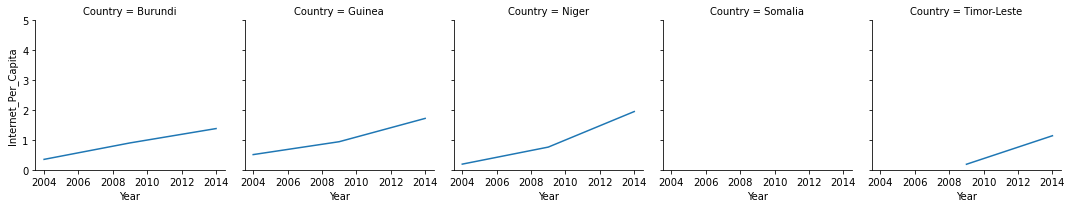

In [42]:
g_bottom_5_internet = sns.FacetGrid(bottom_5_internet, col="Country", ylim = (0,5))
g_bottom_5_internet.map_dataframe(sns.lineplot, x="Year", y="Internet_Per_Capita")

29.	Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

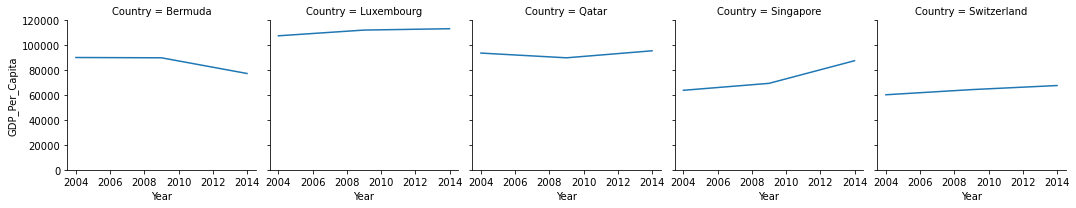

In [49]:
gdp_internet_2014.nlargest(5, 'GDP_Per_Capita')
top_5_GDP = gdp_internet_2004_2009_2014.loc[(gdp_internet_2004_2009_2014.Country == 'Luxembourg') | (gdp_internet_2004_2009_2014.Country == 'Qatar') | (gdp_internet_2004_2009_2014.Country == 'Singapore') | (gdp_internet_2004_2009_2014.Country == 'Bermuda') | (gdp_internet_2004_2009_2014.Country == 'Switzerland')]
g_top_5_GDP = sns.FacetGrid(top_5_GDP, col="Country", ylim = (0,120000))
g_top_5_GDP.map_dataframe(sns.lineplot, x="Year", y="GDP_Per_Capita")

96. Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

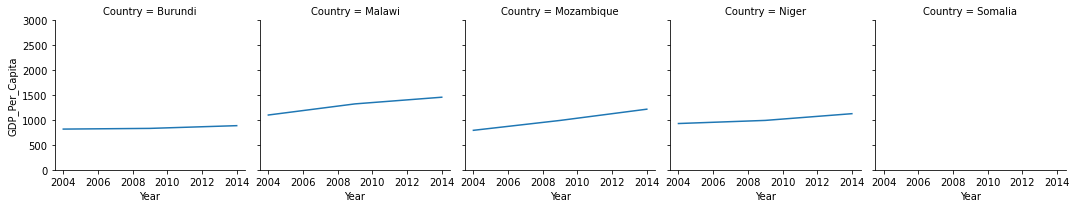

In [53]:
gdp_internet_2014.nsmallest(5, 'GDP_Per_Capita')
bottom_5_GDP = gdp_internet_2004_2009_2014.loc[(gdp_internet_2004_2009_2014.Country == 'Burundi') | (gdp_internet_2004_2009_2014.Country == 'Somalia') | (gdp_internet_2004_2009_2014.Country == 'Niger') | (gdp_internet_2004_2009_2014.Country == 'Mozambique') | (gdp_internet_2004_2009_2014.Country == 'Malawi')]
g_bottom_5_GDP = sns.FacetGrid(bottom_5_GDP, col="Country",ylim = (0,3000))
g_bottom_5_GDP.map_dataframe(sns.lineplot, x="Year", y="GDP_Per_Capita")

30.	Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.